<img src="https://i.imgur.com/FoKB5Z5.png" align="left" width="300" height="250" title="source: imgur.com" /></a>

## Program Code: J620-002-4:2020 

## Program Name: FRONT-END SOFTWARE DEVELOPMENT

## Title :  Case Study - Data Analysis of Student Performance

#### Name: Chuay Xiang Ze

#### IC Number: 021224070255

#### Date : 6/7/2023

#### Introduction : Learning about how to display graphs from csv



#### Conclusion : Managed to complete task relating to the topic.






**Guideline EDA
link: https://medium.com/dataseries/an-eda-checklist-800beeaee555**

**Sample Exercise:**

High Student students academic performance

I'll do the dataset in Excel



**Randomizers in Excel (dont shoot me)**

I like to "visualize my simulated data" 

=RANDBETWEEN(0,100)

=CHOOSE(RANDBETWEEN(1,3),"B40","M40","T20")

**What data is needed?**

Describe the data

    Student demography
    Subjects taken
    Trial exam results
    attendance, contact Hours
    Final results
    Others? Sports activities


"Correlation is not causation"

Means that just because two things correlate does not necessarily mean that one causes the other. ... Correlations between two things can be caused by a third factor that affects both of them. This sneaky, hidden third wheel is called a confounder.


**Case Study Exercise**

Plot the Student Results table

Some basic stats

Look for Average, Min, Max


## Exploratory Data Analysis (EDA) Check list

- Domain knowledge
    - What is this dataset about?
- Check if the data is intuitive
- Find out how the data was generated
- Understand the process

----
- Select a smaller dataset 
    - depending on the data size, If what to go big bang, make sure enough resources.
- Explore individual features
- Explore pairs and groups

----

- Clean up features

- Selecting features of interest

- Generating derived feature(s)

- Extract , Transform and Load (the whole dataset)

- Sampling the data (in ML)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Import Data from CSV

In [110]:
df = pd.read_csv('./student_performance.csv')
df

,Student ID,Name,Term,IncomeGroup,NonsenseData,School,Tuisyen,Attendance,BM,BI,Maths,Sejarah,Total
0,7,Psy,2,B40,xvxc,SK 8estari,No,60,24,NaN,37,16,77
1,8,Edward,2,M40,sf,SK 8estari,Yes,30,43,28.0,22,34,127
2,6,Mei Lin,2,M40,dsf,SK 8estari,Yes,78,0,20.0,47,63,130
3,9,Miyazawa,2,T20,df,SK 8estari,No,100,32,94.0,33,1,160
4,4,Letchumi,2,T20,xvxc,SK 8estari,No,80,97,52.0,17,11,177
5,3,Muthu,2,T20,sf,SK 8estari,Yes,58,31,65.0,0,82,178
6,5,Ah Chong,2,B40,dsf,SK 8estari,Yes,64,16,84.0,6,94,200
7,2,Siti,2,M40,df,SK 8estari,Yes,57,35,68.0,35,72,210
8,1,Ali,2,B40,xvxc,SK 8estari,No,100,16,89.0,97,97,299
9,10,Ah Beng,2,T20,sf,SK 8estari,No,100,43,100.0,90,92,325


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Student ID    20 non-null     int64  
 1   Name          20 non-null     object 
 2   Term          20 non-null     int64  
 3   IncomeGroup   20 non-null     object 
 4   NonsenseData  20 non-null     object 
 5   School        20 non-null     object 
 6   Tuisyen       20 non-null     object 
 7   Attendance    20 non-null     int64  
 8   BM            20 non-null     int64  
 9   BI            19 non-null     float64
 10  Maths         20 non-null     int64  
 11  Sejarah       20 non-null     int64  
 12  Total         20 non-null     int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.2+ KB


In [5]:
df.isnull().sum()

Student ID      0
Name            0
Term            0
IncomeGroup     0
NonsenseData    0
School          0
Tuisyen         0
Attendance      0
BM              0
BI              1
Maths           0
Sejarah         0
Total           0
dtype: int64

## 2. Data Cleaning - Remove Useless Data

In [111]:
df = df.set_index("Student ID")
df = df.drop(columns=['NonsenseData', 'School'])
df.sort_values(by=['Student ID'], inplace=True)
df

,Name,Term,IncomeGroup,Tuisyen,Attendance,BM,BI,Maths,Sejarah,Total
Student ID,,,,,,,,,,
1,Ali,2,B40,No,100,16,89.0,97,97,299
1,Ali,1,B40,No,100,6,79.0,87,87,259
2,Siti,2,M40,Yes,57,35,68.0,35,72,210
2,Siti,1,M40,Yes,57,25,58.0,25,62,170
3,Muthu,2,T20,Yes,58,31,65.0,0,82,178
3,Muthu,1,T20,Yes,58,21,55.0,10,72,158
4,Letchumi,2,T20,No,80,97,52.0,17,11,177
4,Letchumi,1,T20,No,80,87,42.0,7,1,137
5,Ah Chong,2,B40,Yes,64,16,84.0,6,94,200


Text(0.5, 1.0, 'Total Marks per term')

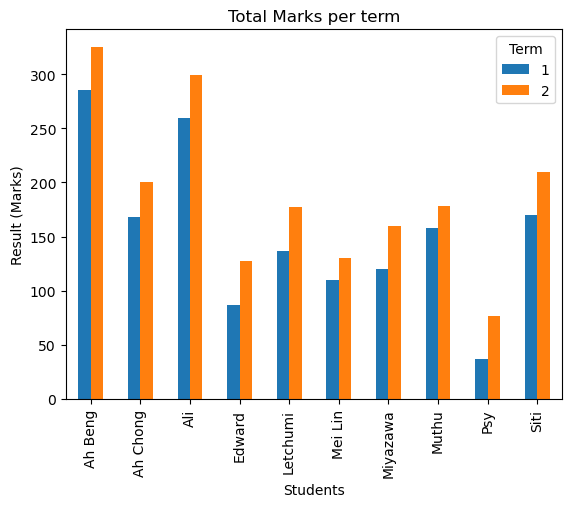

In [124]:
# term_one = df[df['Term'] == 1]
# term_two = df[df['Term'] == 2]
# new_df = pd.DataFrame({'Term 1': term_one['Total'], 'Term 2': term_two['Total']})
# ax = new_df.plot.bar(rot=0)

grouped_df = df.groupby(['Name', 'Term'])['Total'].sum().reset_index()
pivot_df = grouped_df.pivot(index='Name', columns='Term', values='Total')
ax = pivot_df.plot.bar(rot=90)
ax.set_ylabel('Result (Marks)')
ax.set_xlabel('Students')
ax.set_title('Total Marks per term')

## 3. Basic Statistics of Table

In [8]:
df.describe()

,Term,Attendance,BM,BI,Maths,Sejarah,Total
count,20.000000,20.000000,20.000000,19.000000,20.000000,20.000000,20.000000
mean,1.500000,72.700000,29.700000,57.894737,34.800000,51.200000,170.700000
std,0.512989,22.571757,24.525175,31.985925,30.365493,36.685864,75.577844
min,1.000000,30.000000,0.000000,-10.000000,0.000000,-9.000000,37.000000
25%,1.000000,58.000000,15.500000,35.000000,11.500000,14.750000,125.250000
50%,1.500000,71.000000,24.500000,65.000000,26.000000,62.500000,164.000000
75%,2.000000,100.000000,33.500000,84.000000,39.500000,82.500000,202.500000
max,2.000000,100.000000,97.000000,100.000000,97.000000,97.000000,325.000000


### The top 3 and last 3 students each term

In [119]:
top_1 = sorted_df[sorted_df['Term'] == 1].head(3)[['Name', 'Total', 'Term']]
last_1 = sorted_df[sorted_df['Term'] == 1].tail(3)[['Name', 'Total', 'Term']]
top_2 = sorted_df[sorted_df['Term'] == 2].head(3)[['Name', 'Total', 'Term']]
last_2 = sorted_df[sorted_df['Term'] == 2].tail(3)[['Name', 'Total', 'Term']]

print(top_1)
print(last_1)
print(top_2)
print(last_2)

               Name  Total  Term
Student ID                      
10          Ah Beng    285     1
1               Ali    259     1
2              Siti    170     1
               Name  Total  Term
Student ID                      
6           Mei Lin    110     1
8            Edward     87     1
7               Psy     37     1
               Name  Total  Term
Student ID                      
10          Ah Beng    325     2
1               Ali    299     2
2              Siti    210     2
               Name  Total  Term
Student ID                      
6           Mei Lin    130     2
8            Edward    127     2
7               Psy     77     2


### Average Scores for each term

In [11]:
df.groupby('Term')['BI','BM','Maths','Sejarah','Total'].mean()

C:\Users\Xiang Ze\AppData\Local\Temp\ipykernel_8340\3699696485.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Term')['BI','BM','Maths','Sejarah','Total'].mean()


,BI,BM,Maths,Sejarah,Total
Term,,,,,
1,50.000000,25.7,31.2,46.2,153.1
2,66.666667,33.7,38.4,56.2,188.3


### Max score for each subject

In [22]:
df.groupby('Term')['BI','BM','Maths','Sejarah','Total'].max()

C:\Users\Xiang Ze\AppData\Local\Temp\ipykernel_8340\2305812590.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Term')['BI','BM','Maths','Sejarah','Total'].max()


,BI,BM,Maths,Sejarah,Total
Term,,,,,
1,90.0,87,87,87,285
2,100.0,97,97,97,325


### Type Markdown and LaTeX:  𝛼2

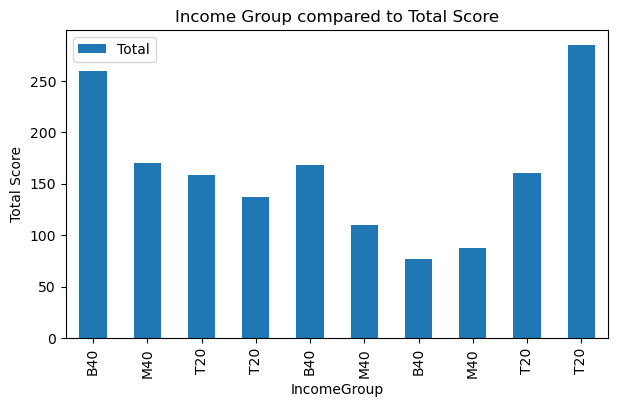

In [112]:
df_deduplicated = df.drop_duplicates(subset='Name', keep='last')
df_deduplicated.reset_index(drop=True, inplace=True)
df_deduplicated.plot.bar(x = 'IncomeGroup', y = 'Total', figsize=(7, 4));
plt.ylabel('Total Score')
plt.title('Students Income Group compared to their totals for Term 1')
plt.show()

C:\Users\Xiang Ze\AppData\Local\Temp\ipykernel_8340\1696529932.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subs = df.groupby('Term')['BI','BM','Maths','Sejarah'].mean().reset_index()


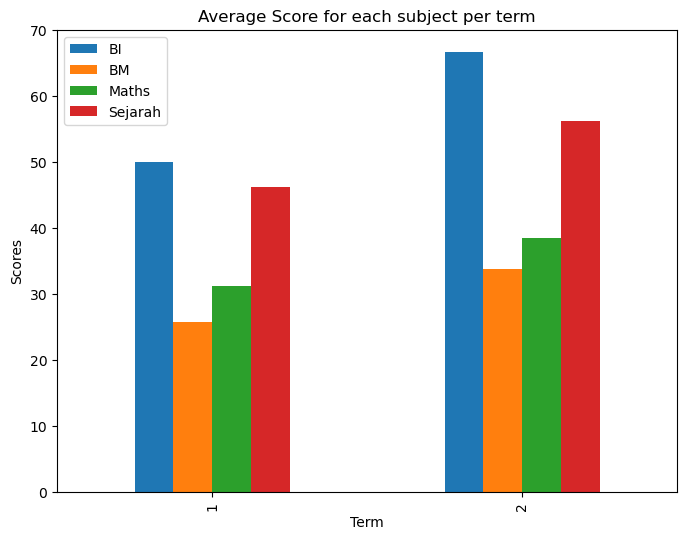

In [88]:
subs = df.groupby('Term')['BI','BM','Maths','Sejarah'].mean().reset_index()
subs.set_index('Term', inplace=True)
subs.plot.bar(figsize=(8, 6))
plt.xlabel('Term')
plt.ylabel('Scores')
plt.title('Average Score for each subject per term')
plt.show()

C:\Users\Xiang Ze\AppData\Local\Temp\ipykernel_8340\984558364.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  subs = df.groupby('Tuisyen')['BI','BM','Maths','Sejarah'].mean().reset_index()


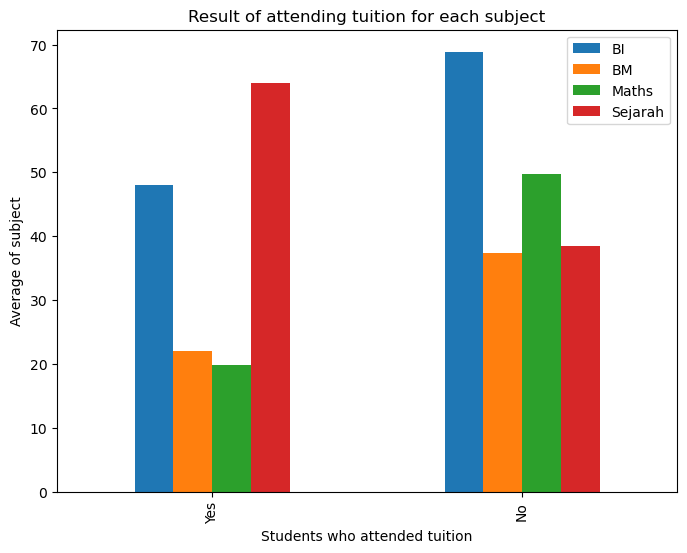

In [93]:
subs = df.groupby('Tuisyen')['BI','BM','Maths','Sejarah'].mean().reset_index()
subs.set_index('Tuisyen', inplace=True)
ax = subs.plot.bar(figsize=(8, 6))
plt.xlabel('Students who attended tuition')
plt.ylabel('Average of subject')
plt.title('Result of attending tuition for each subject')
ax.set_xticklabels(['Yes', 'No'])
plt.show()

## 4. Replace IncomeGroup and Tuisyen to Numerical Value 

In [115]:
df.loc[df['IncomeGroup'] == 'B40', 'IncomeGroup'] = 1
df.loc[df['IncomeGroup'] == 'M40', 'IncomeGroup'] = 2
df.loc[df['IncomeGroup'] == 'T20', 'IncomeGroup'] = 3
df.loc[df['Tuisyen'] == 'No', 'Tuisyen'] = 1
df.loc[df['Tuisyen'] == 'Yes', 'Tuisyen'] = 0
df

,Name,Term,IncomeGroup,Tuisyen,Attendance,BM,BI,Maths,Sejarah,Total
Student ID,,,,,,,,,,
1,Ali,2,1,1,100,16,89.0,97,97,299
1,Ali,1,1,1,100,6,79.0,87,87,259
2,Siti,2,2,0,57,35,68.0,35,72,210
2,Siti,1,2,0,57,25,58.0,25,62,170
3,Muthu,2,3,0,58,31,65.0,0,82,178
3,Muthu,1,3,0,58,21,55.0,10,72,158
4,Letchumi,2,3,1,80,97,52.0,17,11,177
4,Letchumi,1,3,1,80,87,42.0,7,1,137
5,Ah Chong,2,1,0,64,16,84.0,6,94,200


## 5. Check the correlation between income group, tuisyen and result

In [123]:
df['IncomeGroup'] = df['IncomeGroup'].astype(float)
df['Tuisyen'] = df['Tuisyen'].astype(float)
df[['IncomeGroup', 'Tuisyen', 'BM', 'BI', 'Sejarah', 'Total']].corr()

,IncomeGroup,Tuisyen,BM,BI,Sejarah,Total
IncomeGroup,1.000000,0.120386,0.565563,0.192207,-0.259916,0.129596
Tuisyen,0.120386,1.000000,0.322119,0.335015,-0.357972,0.229420
BM,0.565563,0.322119,1.000000,0.018501,-0.427311,0.045778
BI,0.192207,0.335015,0.018501,1.000000,0.410982,0.799557
Sejarah,-0.259916,-0.357972,-0.427311,0.410982,1.000000,0.713688
Total,0.129596,0.229420,0.045778,0.799557,0.713688,1.000000


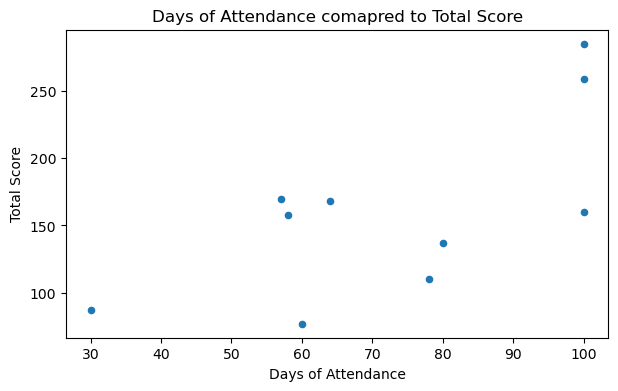

In [122]:
df_deduplicated = df.drop_duplicates(subset='Name', keep='last')
df_deduplicated.reset_index(drop=True, inplace=True)
df_deduplicated.plot.scatter(x = 'Attendance', y = 'Total', s = 20, figsize=(7, 4));
plt.xlabel('Days of Attendance')
plt.ylabel('Total Score')
plt.title('Days of Attendance comapred to Total Score')

plt.show()

## 6. Conclusion

What is your finding?